In our final notebook, we are combing all four of our exported datasets in CSV form, to find out what the safest neighborhood in Pittsburgh is,going off the factors, Coronavirus Vaccinations, Traffic Signs, Police Incidents, and Public School enrollment. Now that we have our 4 CSV datafiles categorized by their own data points from best to worse, we can input them with pandas

In [117]:
import pandas as pd

df1 = pd.read_csv("Covid19 Points.csv", sep=",")
df2 = pd.read_csv("TrafficSigns INDEXED.csv", sep=",")
df3 = pd.read_csv("INDEXED_police_data_pgh.csv", sep=",")
df4 = pd.read_csv("school enrollments dataframe.csv", sep=",")

Now that we have our dataframes, we want to trim every one to ensure that we have a singular neighborhood, and a value assigned to it representing whatever category it is, and then convert it to a dictionary. After that we can convert the values of a dictionary to a scale of 100, the top value on the list being 100 and then convert everything to a percentage like a grade.

In [118]:
df1.head(10)

,City,Vax Points
0,Squirrel Hill South,46909.5
1,Shadyside,41176.0
2,Brookline,32014.5
3,Squirrel Hill North,27880.5
4,Bloomfield,23722.5
5,Carrick,20905.5
6,Greenfield,20130.5
7,Highland Park,19576.5
8,Mount Washington,19448.0
9,Southside Flats,18198.5


Dataframe 1 of covid vaccinations is already in this format, so we can convert it now

In [119]:
dict1 = {}
for index, row in df1.iterrows():
    dict1[row['City']] = row['Vax Points']
dict1

{'Squirrel Hill South': 46909.5,
 'Shadyside': 41176.0,
 'Brookline': 32014.5,
 'Squirrel Hill North': 27880.5,
 'Bloomfield': 23722.5,
 'Carrick': 20905.5,
 'Greenfield': 20130.5,
 'Highland Park': 19576.5,
 'Mount Washington': 19448.0,
 'Southside Flats': 18198.5,
 'Point Breeze': 17654.0,
 'Beechview': 17508.0,
 'Brighton Heights': 16574.0,
 'North Oakland': 16393.5,
 'East Liberty': 14361.0,
 'Central Lawrenceville': 13391.5,
 'Central Business District': 12703.5,
 'Stanton Heights': 12684.0,
 'Banksville': 10766.5,
 'Sheraden': 9573.5,
 'Southside Slopes': 9303.5,
 'Morningside': 9216.5,
 'Perry North': 8618.5,
 'Central Oakland': 8383.0,
 'Crafton Heights': 8347.0,
 'Westwood': 8022.5,
 'Garfield': 7992.0,
 'Overbrook': 7836.5,
 'Hazelwood': 7772.0,
 'Central Northside': 7734.5,
 'Perry South': 7472.0,
 'Lower Lawrenceville': 7366.5,
 'Lincoln-Lemington-Belmar': 7327.5,
 'Lincoln Place': 7233.0,
 'Marshall-Shadeland': 7223.5,
 'South Oakland': 7051.5,
 'Upper Lawrenceville': 6713

In [120]:
df2.head(10)

,Unnamed: 0,city,description,neighborhood
0,0,Pittsburgh,Stop,California-Kirkbride
1,1,Pittsburgh,Stop,Overbrook
2,2,Pittsburgh,Stop,Squirrel Hill North
3,3,Pittsburgh,Stop,Highland Park
4,4,Pittsburgh,Wayfinding Signage,North Shore
5,5,Pittsburgh,Wayfinding Signage,East Allegheny
6,6,Pittsburgh,Wayfinding Signage,Central Northside
7,7,Pittsburgh,Wayfinding Signage,East Allegheny
8,8,Pittsburgh,Wayfinding Signage,East Allegheny
9,9,Pittsburgh,Stop,Highland Park


Dataframe 2 of traffic signs needs to be calculated solely by the amount of time we see a neighborhood appear, so we can drop everything else.

In [121]:
df2 = df2.drop(labels="Unnamed: 0", axis=1)
df2 = df2.drop(labels="city", axis=1)
df2 = df2.drop(labels="description", axis=1)
df2.head(10)

,neighborhood
0,California-Kirkbride
1,Overbrook
2,Squirrel Hill North
3,Highland Park
4,North Shore
5,East Allegheny
6,Central Northside
7,East Allegheny
8,East Allegheny
9,Highland Park


Finally, we can add all the neighborhoods to our second dictionary and assign their values based on their occurances.

In [122]:
dict2 = {}
for index, row in df2.iterrows():
    if row['neighborhood'] not in dict2:
        dict2[row['neighborhood']] = 1
    else:
        dict2[row['neighborhood']] = dict2[row['neighborhood']]+1
dict2

{'California-Kirkbride': 183,
 'Overbrook': 712,
 'Squirrel Hill North': 1895,
 'Highland Park': 1490,
 'North Shore': 1053,
 'East Allegheny': 1066,
 'Central Northside': 1251,
 'Bluff': 978,
 'Point Breeze': 1284,
 'Central Oakland': 1327,
 'North Oakland': 1743,
 'South Oakland': 1049,
 'Shadyside': 3370,
 'West Oakland': 486,
 'Central Business District': 3491,
 'Terrace Village': 306,
 'Mount Washington': 1630,
 'Upper Hill': 631,
 'Polish Hill': 349,
 'Middle Hill': 562,
 'East Hills': 291,
 'Squirrel Hill South': 3281,
 'East Liberty': 1759,
 'Brighton Heights': 903,
 'Knoxville': 750,
 'Lincoln-Lemington-Belmar': 487,
 'Homewood South': 999,
 'Greenfield': 1048,
 'Bloomfield': 3627,
 'Homewood North': 643,
 'Carrick': 2044,
 'Strip District': 1366,
 'Regent Square': 308,
 'Crawford-Roberts': 784,
 'South Side Slopes': 1175,
 'South Side Flats': 3672,
 nan: 143,
 'Allegheny Center': 598,
 'Lower Lawrenceville': 1024,
 'Beechview': 1397,
 'Spring Hill-City View': 355,
 'Marshall-

In [123]:
df3.head(10)

,Unnamed: 0,INCIDENTNEIGHBORHOOD,OFFENSES
0,1501,Allegheny Center,3745 Accidents Involving Damage to Unattended ...
1,233,Allegheny Center,9496 Dead on Arrival (DOA)
2,752,Allegheny Center,7615(a)(1) Computer Trespass - Remove Data
3,62,Allegheny Center,3701 Robbery. / 2702 Aggravated Assault. / 270...
4,1146,Allegheny Center,029 Missing Juvenile
5,922,Allegheny Center,4910 Tampering with or Fabricating Physical Ev...
6,2215,Allegheny Center,9489 Found Property
7,1467,Allegheny Center,3503 Criminal Trespass
8,115,Allegheny Center,9999 9999 - (Misc. Incident):
9,1590,Allegheny Center,9998 Overdose Other


Dataframe 3 police incidents is the same as dataframe 2 in terms of number of instances being listed by occurance so we can apply the same code that we did to traffic signs.

In [124]:
df3 = df3.drop(labels="Unnamed: 0", axis=1)
df3 = df3.drop(labels="OFFENSES", axis=1)
df3.head(10)

,INCIDENTNEIGHBORHOOD
0,Allegheny Center
1,Allegheny Center
2,Allegheny Center
3,Allegheny Center
4,Allegheny Center
5,Allegheny Center
6,Allegheny Center
7,Allegheny Center
8,Allegheny Center
9,Allegheny Center


In [125]:
dict3 = {}
for index, row in df3.iterrows():
    if row['INCIDENTNEIGHBORHOOD'] not in dict2:
        dict3[row['INCIDENTNEIGHBORHOOD']] = 1
    else:
        dict3[row['INCIDENTNEIGHBORHOOD']] = dict2[row['INCIDENTNEIGHBORHOOD']]+1
dict3

{'Allegheny Center': 599,
 'Allegheny West': 467,
 'Allentown': 576,
 'Arlington': 342,
 'Arlington Heights': 22,
 'Banksville': 359,
 'Bedford Dwellings': 130,
 'Beechview': 1398,
 'Beltzhoover': 698,
 'Bloomfield': 3628,
 'Bluff': 979,
 'Bon Air': 206,
 'Brighton Heights': 904,
 'Brookline': 2257,
 'California-Kirkbride': 184,
 'Carrick': 2045,
 'Central Business District': 3492,
 'Central Lawrenceville': 1971,
 'Central North Side': 1,
 'Central Oakland': 1328,
 'Chartiers City': 45,
 'Chateau': 406,
 'Crafton Heights': 471,
 'Crawford-Roberts': 785,
 'Duquesne Heights': 453,
 'East Allegheny': 1067,
 'East Carnegie': 123,
 'East Hills': 292,
 'East Liberty': 1760,
 'Elliott': 548,
 'Esplen': 99,
 'Fairywood': 142,
 'Fineview': 218,
 'Friendship': 457,
 'Garfield': 849,
 'Glen Hazel': 39,
 'Greenfield': 1049,
 'Hays': 216,
 'Hazelwood': 1301,
 'Highland Park': 1491,
 'Homewood North': 644,
 'Homewood South': 1000,
 'Homewood West': 249,
 'Knoxville': 751,
 'Larimer': 513,
 'Lincoln 

In [126]:
df4.head(10)

,neighborhood,total_students_enrolled
0,Carrick,541.0
1,Brookline,526.0
2,Carrick,378.0
3,Beechview,339.0
4,Brookline,310.0
5,Brighton Heights,296.0
6,Carrick,293.0
7,Squirrel Hill South,286.0
8,Homewood North,282.0
9,Brookline,276.0


Dataframe 4 of public school enrollment has multiple instances and values, so we can combine our code from dataframe 1, and dataframe 2 or 3 to get our desired dictionary.

In [127]:
dict4 = {}
for index, row in df4.iterrows():
    if row['neighborhood'] in dict4:
        dict4[row['neighborhood']] = row['total_students_enrolled'] + dict4[row['neighborhood']]
    else:
        dict4[row['neighborhood']] = row['total_students_enrolled']
dict4

{'Carrick': 1276.0,
 'Brookline': 1169.0,
 'Beechview': 794.0,
 'Brighton Heights': 598.0,
 'Squirrel Hill South': 679.0,
 'Homewood North': 589.0,
 'East Hills': 569.0,
 'Sheraden': 694.0,
 'Knoxville': 616.0,
 'Northview Heights': 527.0,
 'East Liberty': 496.0,
 'Crafton Heights': 539.0,
 'Hazelwood': 567.0,
 'Homewood South': 477.0,
 'Marshall-Shadeland': 467.0,
 'Garfield': 520.0,
 'Mt. Oliver Borough': 479.0,
 'Lincoln-Lemington-Belmar': 508.0,
 'Greenfield': 487.0,
 'Terrace Village': 401.0,
 'Mount Washington': 410.0,
 'Wilkinsburg Borough': 303.0,
 'Perry South': 443.0,
 'Perry North': 397.0,
 'Highland Park': 412.0,
 'Point Breeze': 317.0,
 'Squirrel Hill North': 328.0,
 'Stanton Heights': 332.0,
 'Allentown': 284.0,
 'Larimer': 256.0,
 'Westwood': 269.0,
 'Bloomfield': 261.0,
 'Middle Hill': 228.0,
 'Overbrook': 264.0,
 'Spring Hill-City View': 239.0,
 'Shadyside': 217.0,
 'Bedford Dwellings': 220.0,
 'Lincoln Place': 237.0,
 'Beltzhoover': 245.0,
 'Elliott': 229.0,
 'Crawfor

Now that we have all of our points of data in a dictionary in the same format, we want to put them all on a scale that can be "graded" by the same standards. Some datas have values in 100s, where others reach the 10,000s. So for every item in the dictionary, we are going to get the percentages of each neighborhood on a scale of whatever the top neighborhood is. 

For example if Carrick was our highest neighboor with 541 in students enrolled in public schools, they would get a 100%.
Brooklines grade would be 526/541 on the percent scale or 97.23% All our "grades" will be rounded to two decimal places.

Firstly, lets double check we know the highest value in each dictionary. We can make a function for this so we don't have to repeat our code 4 times.

In [128]:
def findCity(dictionary):
    total = 0
    city = ""
    for x in dictionary:
        if dictionary[x] > total:
            city=x
            total=dictionary[x]
    print("The best city in this dictionary is",city,"with a value of",total)
print("Dictionary 1:")    
findCity(dict1)
print("Dictionary 2:")  
findCity(dict2)
print("Dictionary 3:")  
findCity(dict3)
print("Dictionary 4:")  
findCity(dict4)

Dictionary 1:
The best city in this dictionary is Squirrel Hill South with a value of 46909.5
Dictionary 2:
The best city in this dictionary is South Side Flats with a value of 3672
Dictionary 3:
The best city in this dictionary is South Side Flats with a value of 3673
Dictionary 4:
The best city in this dictionary is Carrick with a value of 1276.0


Now that we have our values, we can run through each dictionary and convert the values to percentages with the highest value being the percentage. 

In [129]:
def percentify(dictionary, highestVal):
    for x in dictionary:
        dictionary[x]=round((dictionary[x]/highestVal)*100,2)
percentify(dict1, 46909.5)
percentify(dict2, 3672)
percentify(dict3, 3673)
percentify(dict4, 1276)
dict1

{'Squirrel Hill South': 100.0,
 'Shadyside': 87.78,
 'Brookline': 68.25,
 'Squirrel Hill North': 59.43,
 'Bloomfield': 50.57,
 'Carrick': 44.57,
 'Greenfield': 42.91,
 'Highland Park': 41.73,
 'Mount Washington': 41.46,
 'Southside Flats': 38.79,
 'Point Breeze': 37.63,
 'Beechview': 37.32,
 'Brighton Heights': 35.33,
 'North Oakland': 34.95,
 'East Liberty': 30.61,
 'Central Lawrenceville': 28.55,
 'Central Business District': 27.08,
 'Stanton Heights': 27.04,
 'Banksville': 22.95,
 'Sheraden': 20.41,
 'Southside Slopes': 19.83,
 'Morningside': 19.65,
 'Perry North': 18.37,
 'Central Oakland': 17.87,
 'Crafton Heights': 17.79,
 'Westwood': 17.1,
 'Garfield': 17.04,
 'Overbrook': 16.71,
 'Hazelwood': 16.57,
 'Central Northside': 16.49,
 'Perry South': 15.93,
 'Lower Lawrenceville': 15.7,
 'Lincoln-Lemington-Belmar': 15.62,
 'Lincoln Place': 15.42,
 'Marshall-Shadeland': 15.4,
 'South Oakland': 15.03,
 'Upper Lawrenceville': 14.31,
 'Troy Hill': 14.22,
 'Duquesne Heights': 13.48,
 'Knox

Before we do our final averaging of these percentage grades, we need to remember that dictionary 3 is measured by crime rate, so to convert those percentages to be applicable, we can subract them all by 100 then take the absolute value so that the higher grade will actually be better for that neighborhood.

In [130]:
for x in dict3:
    dict3[x]=round(abs(dict3[x]-100),2)

Now we are ready to take the averages of all our grades from each dictionary into one new dictionary. 
To do this we'll start of with the values of one of our dictionaries, then average the rest of the dictionaries into it one at a time 

In [131]:
final = dict1
def dictAvg(dic1,dic2):
    dic = {}  
    for x in dic1:
        if x in dic2:
            dic[x] = round(((dic1[x]+dic2[x])/2), 2)
    return dic
final = dictAvg(final,dict2)
final = dictAvg(final,dict3)
final = dictAvg(final,dict4)
final

{'Squirrel Hill South': 52.94,
 'Shadyside': 33.01,
 'Brookline': 71.66,
 'Squirrel Hill North': 38.83,
 'Bloomfield': 29.2,
 'Carrick': 73.61,
 'Greenfield': 45.88,
 'Highland Park': 41.28,
 'Mount Washington': 40.7,
 'Point Breeze': 37.75,
 'Beechview': 56.02,
 'Brighton Heights': 49.77,
 'East Liberty': 42.27,
 'Central Lawrenceville': 27.11,
 'Stanton Heights': 39.58,
 'Banksville': 33.3,
 'Sheraden': 51.69,
 'Morningside': 31.81,
 'Perry North': 40.16,
 'Crafton Heights': 46.73,
 'Westwood': 36.37,
 'Garfield': 44.61,
 'Overbrook': 35.01,
 'Hazelwood': 44.86,
 'Perry South': 41.54,
 'Lower Lawrenceville': 26.65,
 'Lincoln-Lemington-Belmar': 45.19,
 'Lincoln Place': 34.3,
 'Marshall-Shadeland': 42.53,
 'South Oakland': 26.28,
 'Upper Lawrenceville': 28.7,
 'Troy Hill': 30.24,
 'Duquesne Heights': 28.16,
 'Knoxville': 48.12,
 'Crawford-Roberts': 32.79,
 'Point Breeze North': 29.4,
 'Friendship': 26.84,
 'Spring Hill-City View': 34.46,
 'Manchester': 29.93,
 'East Allegheny': 25.29,


During the averaging process, we also removed any neighborhoods that weren't in all 4 of our datasets so that we wouldn't have any outliers being evaluated by a singular dictionary. 

Now we can convert this dictionary back to a pandas dataframe and plot our data!

In [132]:
newList = list(final.items())
new = pd.DataFrame (newList, columns = ['City','Grade']) 
new = new.sort_values(by=['Grade'], ascending=False)
new.head(77)

,City,Grade
5,Carrick,73.61
2,Brookline,71.66
10,Beechview,56.02
0,Squirrel Hill South,52.94
16,Sheraden,51.69
...,...,...
71,Chartiers City,25.69
70,East Carnegie,25.32
39,East Allegheny,25.29
73,West End,24.96


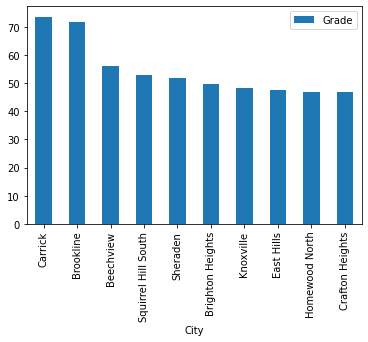

In [133]:
new.head(10).plot(x='City', y='Grade', kind='bar')	

As you can see, Carnic, Brookline, and Beechview are our top 3 neighborhoods to live in, in terms of safety and education. No neighborhood grade not being 100% because no neighborhood is perfect, but these are the top 10 best.